In [28]:
import sys
print(sys.prefix)
print(sys.executable)

/home/aaryash-u/Documents/byteForce/computer-vision/venv
/home/aaryash-u/Documents/byteForce/computer-vision/venv/bin/python


In [29]:
# %pip install opencv-python-headless matplotlib numpy imutils easyocr

from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import cv2

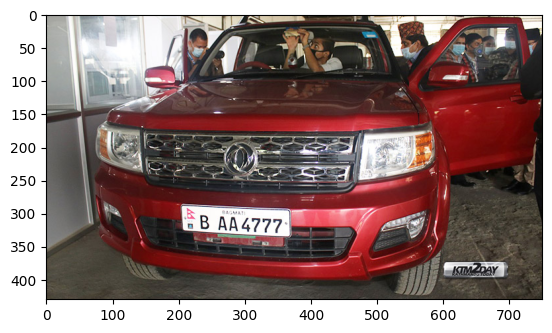

In [30]:
# Print original
carPath = '/home/aaryash-u/Pictures/nepali-car2.png'
bikePath = '/home/aaryash-u/Pictures/nepali-bike1.png'
img = cv2.imread(carPath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

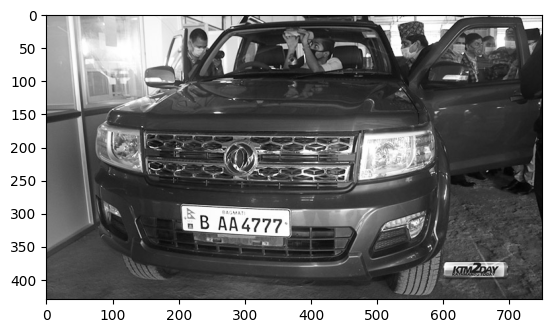

In [31]:
# Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

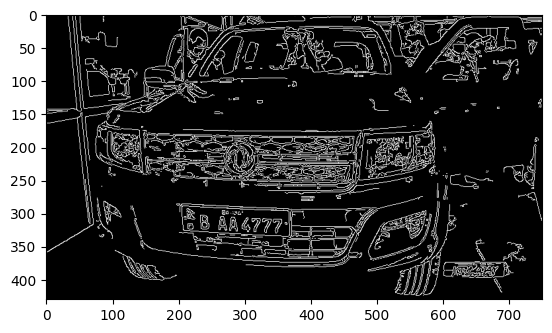

In [32]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

[[[205 291]]

 [[364 296]]

 [[368 332]]

 [[209 326]]]


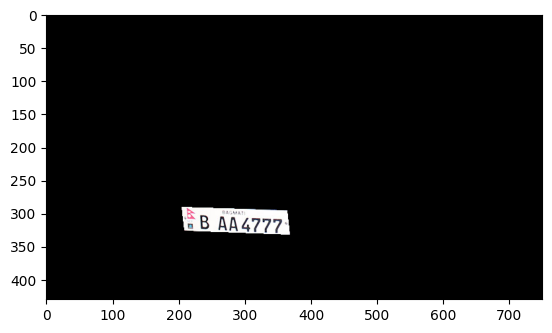

In [33]:
# Find contours and apply mask
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
print(location)

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


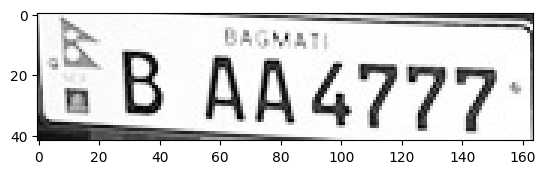

In [34]:
# Zoom on the mask

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [35]:
# Read text with EacyOCR
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[np.int32(23), np.int32(7)],
   [np.int32(157), np.int32(7)],
   [np.int32(157), 42],
   [np.int32(23), 42]],
  'B AA 4777',
  np.float64(0.6885287731908909))]

B AA 4777 


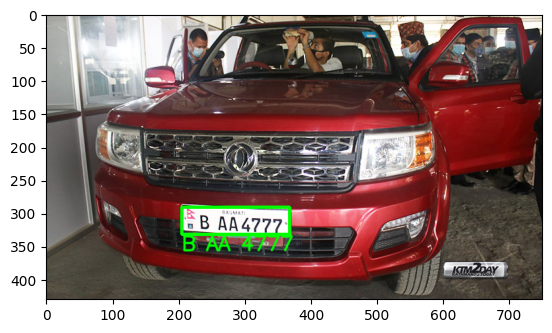

In [36]:
# Render with highlight
text = ''
for i in result:
  text += i[-2] + " "
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
print(text)